In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

In [54]:
review_data = pd.read_csv('output.csv')
print(review_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5441 entries, 0 to 5440
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   video game  5441 non-null   object
 1   username    5441 non-null   object
 2   date        5441 non-null   object
 3   score       5441 non-null   int64 
 4   review      5441 non-null   object
 5   rating      5441 non-null   object
dtypes: int64(1), object(5)
memory usage: 255.2+ KB
None


In [6]:
review_data.head()

,video game,username,date,score,review,rating
0,the-lord-of-the-rings---gollum,vova22379,27-Jul-23,0,⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...,Negative
1,the-lord-of-the-rings---gollum,Xeculiar,24-Jul-23,0,so horrendously bad I **** my pants and had a ...,Negative
2,the-lord-of-the-rings---gollum,Dirac,22-Jul-23,1,This game is inspirational.\rAfter playing thi...,Negative
3,the-lord-of-the-rings---gollum,GyurMaGyuri7947,20-Jul-23,0,Typical after-2013 game (huge hype and then hu...,Negative
4,the-lord-of-the-rings---gollum,JDear,9-Jul-23,5,Better than I expected. Some cool ideas but mo...,Average


In [7]:
review_data['rating'].value_counts()

Negative    2762
Positive    2149
Average      530
Name: rating, dtype: int64

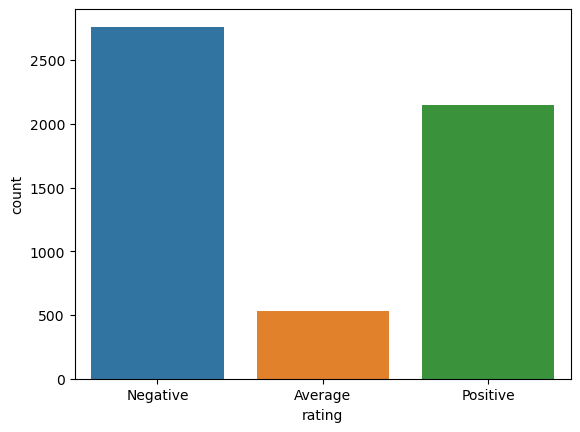

In [8]:
sns.countplot(x='rating',data=review_data)
plt.show()

In [9]:
# Stores number of unique reviewers and corresponding number of reviews written
r_er, r_count = np.unique(review_data['username'], return_counts=True)
pd.DataFrame(r_count).describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
0,2990.00,1.82,1.44,1.00,1.00,1.00,3.00,24.00


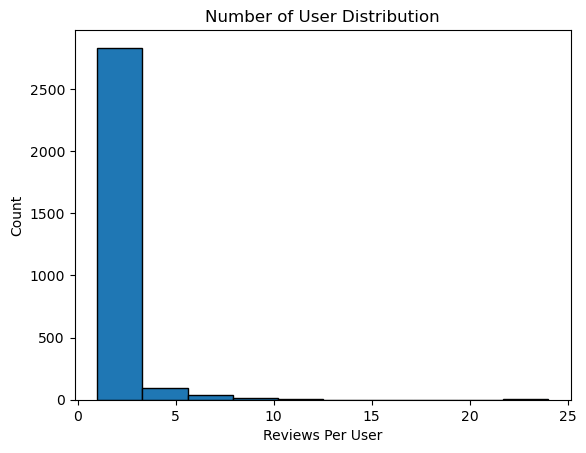

In [10]:
plt.hist(r_count,edgecolor='black')
plt.title('Number of User Distribution')
plt.xlabel('Reviews Per User')
plt.ylabel('Count')
plt.show()

An overwhelming number of users reviewed a video game only once. 

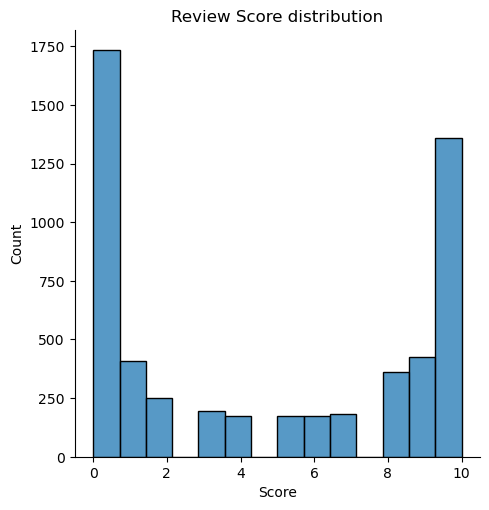

In [11]:
sns.displot(review_data['score'])
plt.title('Review Score distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

The lowest possible value is the most frequent score given to a video game upon review. With the highest possible value being the second most frequent score given.

In [104]:
neg_rev = review_data[review_data['rating'] == 'Negative']
neg_rev

,video game,username,date,score,review,rating
0,the-lord-of-the-rings---gollum,vova22379,27-Jul-23,0,⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...,Negative
1,the-lord-of-the-rings---gollum,Xeculiar,24-Jul-23,0,so horrendously bad I **** my pants and had a ...,Negative
2,the-lord-of-the-rings---gollum,Dirac,22-Jul-23,1,This game is inspirational.\rAfter playing thi...,Negative
3,the-lord-of-the-rings---gollum,GyurMaGyuri7947,20-Jul-23,0,Typical after-2013 game (huge hype and then hu...,Negative
5,the-lord-of-the-rings---gollum,bokarsh-z,1-Jul-23,0,==========even free or watch it on utube not w...,Negative
...,...,...,...,...,...,...
5433,lego-2k-drive,HazzyDevil,20-May-23,0,This abomination needs to be shutdown. The pre...,Negative
5435,layers-of-fear,tillas,19-Jun-23,3,A real **** You walk walk walk read read read ...,Negative
5436,layers-of-fear,cemil,18-Jun-23,0,it's a very boring game i didn't enjoy it at a...,Negative
5439,layers-of-fear,bokarsh-z,17-Jun-23,2,=======-even free not worth it.=======-awful g...,Negative


In [105]:
text = " ".join(rev for rev in neg_rev.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1151373 words in the combination of all review.


In [74]:
words, count_num = np.unique(text.split(), return_counts=True)


In [106]:
import string
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    text_nopunct = "".join([char for char in text_nopunct if char not in string.digits])
    return text_nopunct

clean_text = remove_punct(text)

In [88]:
string.digits

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
words, count_num = np.unique(clean_text.split(), return_counts=True)
print(words)
count_num

['A' 'AA' 'AAA' ... '키보드' '필드' '해상도는']


array([231,   3,  67, ...,   2,   1,   1], dtype=int64)

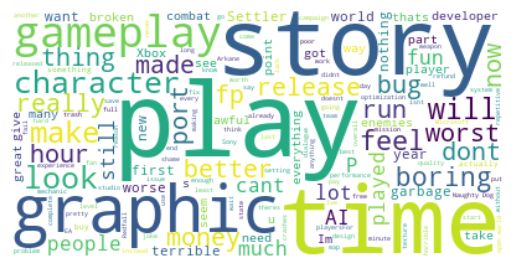

In [109]:
stopwords = set(STOPWORDS)
stopwords.update(['game', 'review', 'playing','bad','good','games','even','PC','one'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(clean_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [96]:
pos_rev = review_data[review_data['rating'] == 'Positive']
pos_rev

,video game,username,date,score,review,rating
19,the-lord-of-the-rings---gollum,Dein777,3-Jun-23,8,"Interesting characters and beautiful picture, ...",Positive
25,the-lord-of-the-rings---gollum,Slopbo,31-May-23,10,"So like, imagine if Undertale was actually goo...",Positive
27,the-lord-of-the-rings---gollum,AryanLongboard,30-May-23,10,Stand together men. For while those who despis...,Positive
29,the-lord-of-the-rings---gollum,Jinndaniel,30-May-23,10,My favorite part of the game is when Gollum sa...,Positive
32,the-lord-of-the-rings---gollum,Zeed7,28-May-23,10,This will go down as one of the games ever rel...,Positive
...,...,...,...,...,...,...
5429,lego-2k-drive,Romel_SK,25-May-23,10,One of The best game releases in this year. Ev...,Positive
5432,lego-2k-drive,MinePlay512,21-May-23,8,"While Lego 2K Drive is a very good game, I jus...",Positive
5434,layers-of-fear,ybermit,21-Jun-23,10,"This is great horror game, looks to be the bes...",Positive
5437,layers-of-fear,ManOFBanana,18-Jun-23,10,absolutely loved the game and gameplay moments...,Positive


In [101]:
text = " ".join(rev for rev in pos_rev.review)
print ("There are {} characters in the combination of all review.".format(len(text)))

There are 916232 characters in the combination of all review.


In [102]:
import string
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    text_nopunct = "".join([char for char in text_nopunct if char not in string.digits])
    return text_nopunct

clean_text = remove_punct(text)

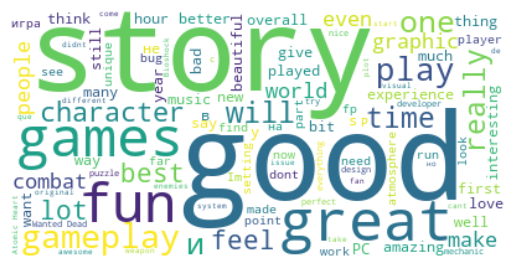

In [103]:
stopwords = set(STOPWORDS)
stopwords.update(['game', 'review', 'playing'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(clean_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()